In [15]:
#Librerias
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import os 
import sys
import io
import pydotplus
import graphviz
from scipy import misc

In [16]:
mainpath= "c:/Python"#Directorio del Archivo.
filename= "data_experience.txt"                      #Nombre Del Archivo.
fullpath =os.path.join(mainpath, filename)      #Unión De Ubicación.
data = pd.read_csv(fullpath)                    #Lectura Del Archivo Plano.
data.head()
data.tail()

,EjeX,EjeY,Frecuencia
114,3.961538,0.012022,4
115,3.961538,0.004996,4
116,4.000000,0.009226,4
117,3.961538,0.022143,4
118,4.361538,0.010092,4


In [17]:
data.groupby("Frecuencia").size()

Frecuencia
4    29
5    30
6    30
7    30
dtype: int64

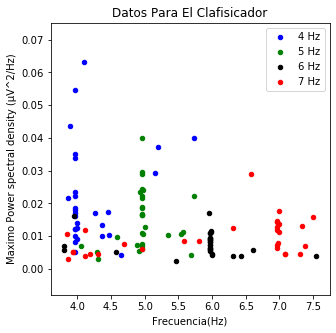

In [18]:
#Figura De Representación De Todos Los Puntos Maximos PSD.
fig= data[data.Frecuencia==4].plot(kind='scatter', x='EjeX', y='EjeY', color='blue', label='4 Hz') 
data[data.Frecuencia==5].plot(kind='scatter', x='EjeX', y='EjeY', color='green', label='5 Hz', ax=fig) 
data[data.Frecuencia==6].plot(kind='scatter', x='EjeX', y='EjeY', color='black', label='6 Hz', ax=fig) 
data[data.Frecuencia==7].plot(kind='scatter', x='EjeX', y='EjeY', color='red', label='7 Hz', ax=fig) 
fig.set_xlabel("Frecuencia(Hz)")
fig.set_ylabel("Maximo Power spectral density (μV^2/Hz)")
fig.set_title("Datos Para El Clafisicador")
plt.rcParams["figure.figsize"]=(5,5)

In [19]:
#Librerias Sklearn Para Clasificadores
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals import joblib
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

In [20]:
x=np.array(data.drop(["Frecuencia"], 1))#Asignación De (x) En Amplitud Y Frecuencia.
y=np.array(data["Frecuencia"])          #Asignación De Etiqueta A (y).
y

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [21]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1)#Asignación De Datos Para Entrenar Y Testear.
print("Datos para Entrenar: %d y Datos para testear: %d"%(x_train.shape[0],x_test.shape[0]))
x_train

Datos para Entrenar: 107 y Datos para testear: 12


array([[4.95723173e+00, 1.09278428e-02],
       [3.96153846e+00, 1.20223858e-02],
       [4.88461538e+00, 7.25151615e-03],
       [6.00000000e+00, 4.41418482e-03],
       [4.97653342e+00, 2.40989387e-02],
       [5.80769231e+00, 8.42422439e-03],
       [4.96153846e+00, 2.22774313e-02],
       [6.96153846e+00, 6.29544208e-03],
       [4.30769231e+00, 2.93109863e-03],
       [3.96153846e+00, 1.00283722e-02],
       [5.56153846e+00, 1.11014878e-02],
       [4.36153846e+00, 1.32800892e-02],
       [6.96153846e+00, 7.31649420e-03],
       [7.30416069e+00, 4.44183459e-03],
       [7.38461538e+00, 7.11440974e-03],
       [7.07547170e+00, 4.45178651e-03],
       [5.98773711e+00, 1.14048712e-02],
       [4.57692308e+00, 5.19528662e-03],
       [5.96153846e+00, 5.51308703e-03],
       [4.69230769e+00, 7.43421052e-03],
       [4.10000000e+00, 6.30588921e-02],
       [4.95723173e+00, 5.97669956e-03],
       [3.96153846e+00, 3.38161809e-02],
       [4.18293363e+00, 4.60592494e-03],
       [3.961538

[[5.96153846e+00 1.10260939e-02]
 [3.93201421e+00 5.09214502e-03]
 [6.57692308e+00 2.90475621e-02]
 [3.93201421e+00 5.09214502e-03]
 [5.96153846e+00 8.17801506e-03]
 [5.96153846e+00 7.34045464e-03]
 [5.96153846e+00 8.17801506e-03]
 [7.07547170e+00 4.45178651e-03]
 [4.96153846e+00 5.92197915e-03]
 [5.96153846e+00 5.61098182e-03]
 [4.92850953e+00 2.33282124e-02]
 [3.96153846e+00 1.79414876e-02]]
[6 7 7 7 6 6 6 7 7 6 5 4]
[6 5 6 5 6 6 6 7 5 6 5 4]


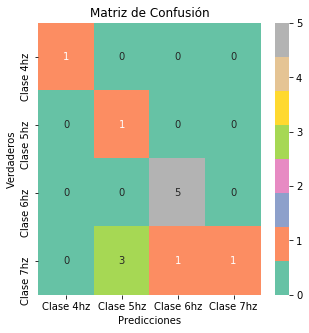

Exactitud: 0.666667
Precisión: 0.868056
Sensibilidad: 0.666667
Puntaje de F1: 0.634343


In [22]:
clf= DecisionTreeClassifier(max_depth =10)  # Tipo de Clasificador, Árbol de Decisión, Ej: Profundidad 10.
dt=clf.fit(x_train, y_train)                # Datos y Función para Entrenar el Clasificador.
y_pred = clf.predict(x_test)                # Datos Predichos. 
print(x_test)
print(y_test)
print(y_pred)
joblib.dump(clf,"ModelDecisionTree")        # Función para guardar el modelo ya entrenado.
features=['Frecuencia','EjeY']              # Caracteristicas de Frecuencia y Amplitud de los datos.
targets=['4hz ','5hz ','6hz ','7hz ']       # Targets de los datos, Etiqueta de los datos.

confusion = confusion_matrix (y_test, y_pred)   # Función Para construir la Matriz de confusión.
columnas=['Clase %s'%(i) for i in list(['4hz','5hz','6hz','7hz'])[:len(np.unique(y_pred))]] # Estructura de Labels en la figura de la Matriz.
df_cm=pd.DataFrame(confusion, index=columnas, columns=columnas) # DataFrame de la Matriz Con sus Clases anexadas.
grafica=sns.heatmap(df_cm,cmap='Set2',annot=True)   # Configuración de la Grafica.
grafica.set(xlabel='Predicciones',ylabel='Verdaderos')
plt.title('Matriz de Confusión')
plt.rcParams["figure.figsize"]=(5,5)
plt.show()                                  # Fin de configuración.

accuracy = accuracy_score(y_test, y_pred)   # Función de Metrica Exactitud.
recall=recall_score(y_test, y_pred,average='weighted')  # Función de Metrica Sensibilidad.
precisio=precision_score(y_test, y_pred,average='weighted') # Función de Metrica Precisión.
f1=f1_score(y_test, y_pred,average='weighted')  # Función de Metrica Puntaje F1.
print("Exactitud: %f" %(accuracy))
print("Precisión: %f" %(precisio))
print("Sensibilidad: %f" %(recall))
print("Puntaje de F1: %f" %(f1))

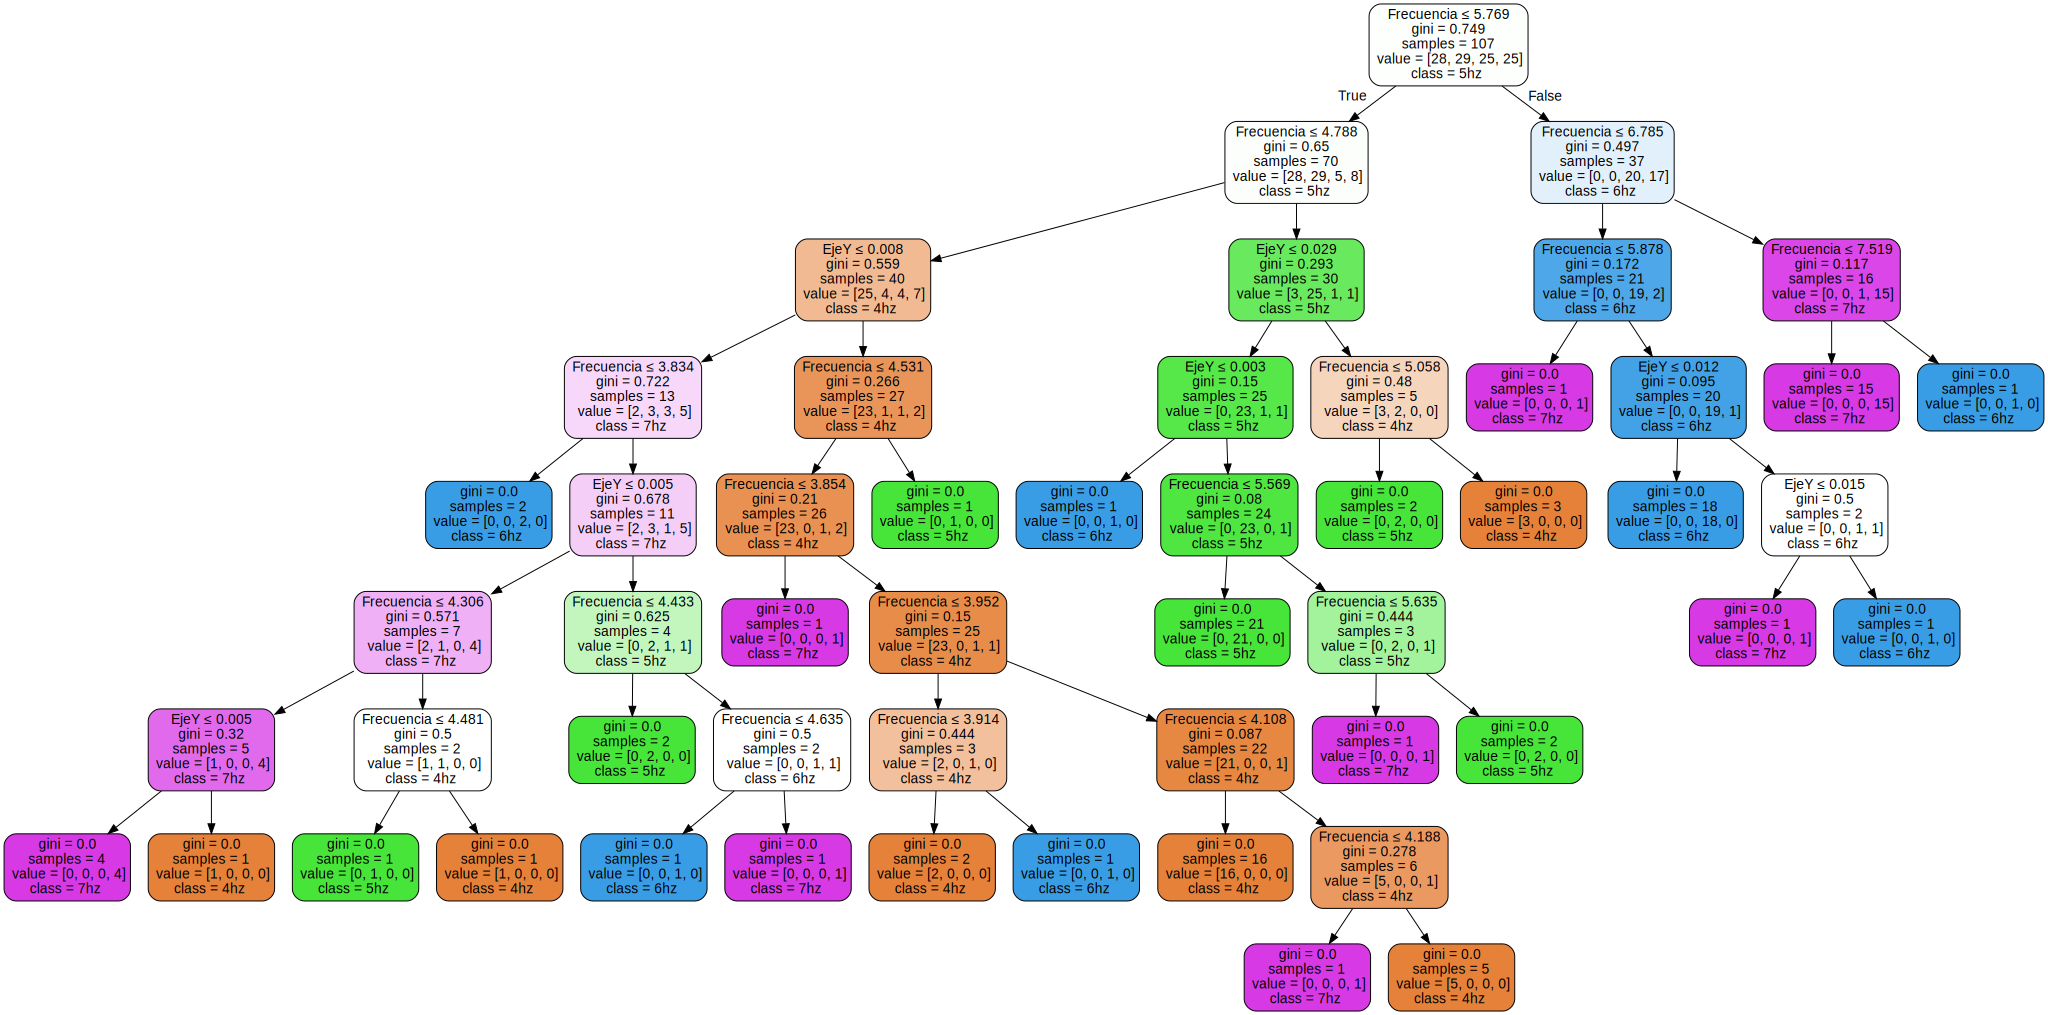

In [23]:
dot_data = tree.export_graphviz(clf, out_file=None, # Inicio de función para graficar el Árbol de Decisión.
                     feature_names=features,  
                     class_names=targets,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph # Fin de de función para graficar el Árbol de Decisión

In [24]:
from IPython.display import Image  # Funciones para Guardar la grafica del Árbol de Decisión en PDF y JPG.
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())
# Crear PDF
graph.write_pdf("Arbol1201.pdf")
# Crear PNG
graph.write_png("Arbol1201.png")

True

([<matplotlib.axis.XTick at 0x13ee58b0>,
 <a list of 5 Text xticklabel objects>)

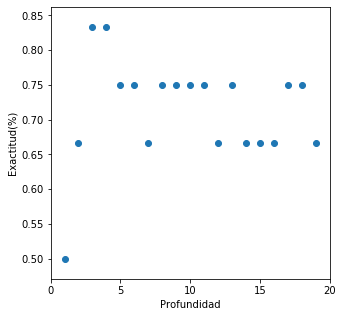

In [25]:
# Función para evaluar la Profundidad del Árbol de Decisión con respecto a la metrica de Exactitud.
k_range = range(1, 20)  # Rango de Profundidaa para la evaluación.
score = []  # Vector para Guardar la Exactitud de cada profundidad.
for k in k_range: # Ciclo para Evaluar cada Porfundidad y anexar el valor de exactitud en score.
    clf= DecisionTreeClassifier(max_depth =k) 
    dt=clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    score.append(accuracy)
plt.figure()    # Configuración para Graficar cada Exactitud con su Profundidad.
plt.xlabel('Profundidad')
plt.ylabel('Exactitud(%)')
plt.scatter(k_range, score)
plt.rcParams["figure.figsize"]=(5,5)
plt.xticks([0,5,10,15,20])
# Nota: Para el Clasificador K Vecinos más Cercanos se procede a cambiar la profundidad
# por el número de vecinos y el tipo de clasificador en "clf" por KNeighborsClassifier(n_neighbors = k).

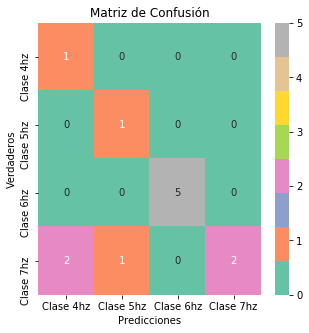

Exactitud: 0.750000
Precisión: 0.902778
Sensibilidad: 0.750000
Puntaje de F1: 0.751984


In [26]:
clf= KNeighborsClassifier(n_neighbors=15)   # Tipo de Clasificador, K Vecinos más Cercanos, Ej: Vecinos 15.
clf.fit(x_train, y_train)                   # Datos y Función para Entrenar el Clasificador.
y_pred = clf.predict(x_test)                # Datos Predichos. 
joblib.dump(clf,"KNeighborsClassifier")     # Función para guardar el modelo ya entrenado.

confusion = confusion_matrix (y_test, y_pred)   # Función Para construir la Matriz de confusión.
columnas=['Clase %s'%(i) for i in list(['4hz','5hz','6hz','7hz'])[:len(np.unique(y_pred))]] # Estructura de Labels en la figura de la Matriz.
df_cm=pd.DataFrame(confusion, index=columnas, columns=columnas) # DataFrame de la Matriz Con sus Clases anexadas.
grafica=sns.heatmap(df_cm,cmap='Set2',annot=True)   # Configuración de la Grafica.
grafica.set(xlabel='Predicciones',ylabel='Verdaderos')
plt.title('Matriz de Confusión')
plt.rcParams["figure.figsize"]=(5,5)
plt.show()                                  # Fin de configuración.

accuracy = accuracy_score(y_test, y_pred)   # Función de Metrica Exactitud.
recall=recall_score(y_test, y_pred,average='weighted')# Función de Metrica Sensibilidad.
precisio=precision_score(y_test, y_pred,average='weighted')# Función de Metrica Precisión.
f1=f1_score(y_test, y_pred,average='weighted')  # Función de Metrica Puntaje F1.

print("Exactitud: %f" %(accuracy))
print("Precisión: %f" %(precisio))
print("Sensibilidad: %f" %(recall))
print("Puntaje de F1: %f" %(f1))